## The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

 ### Load and explore the dataset 

In [36]:
import pandas as pd


wholesale = pd.read_csv('Wholesale_cus_data.csv')

In [37]:
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [38]:
wholesale.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


## Data Cleaning

In [39]:
df = wholesale.drop(['Region'],axis = 1)

In [40]:
df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


#### Checking the number of null values and data type of the variables present in the data set

In [41]:
wholesale.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [42]:
wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Visualize the dataset

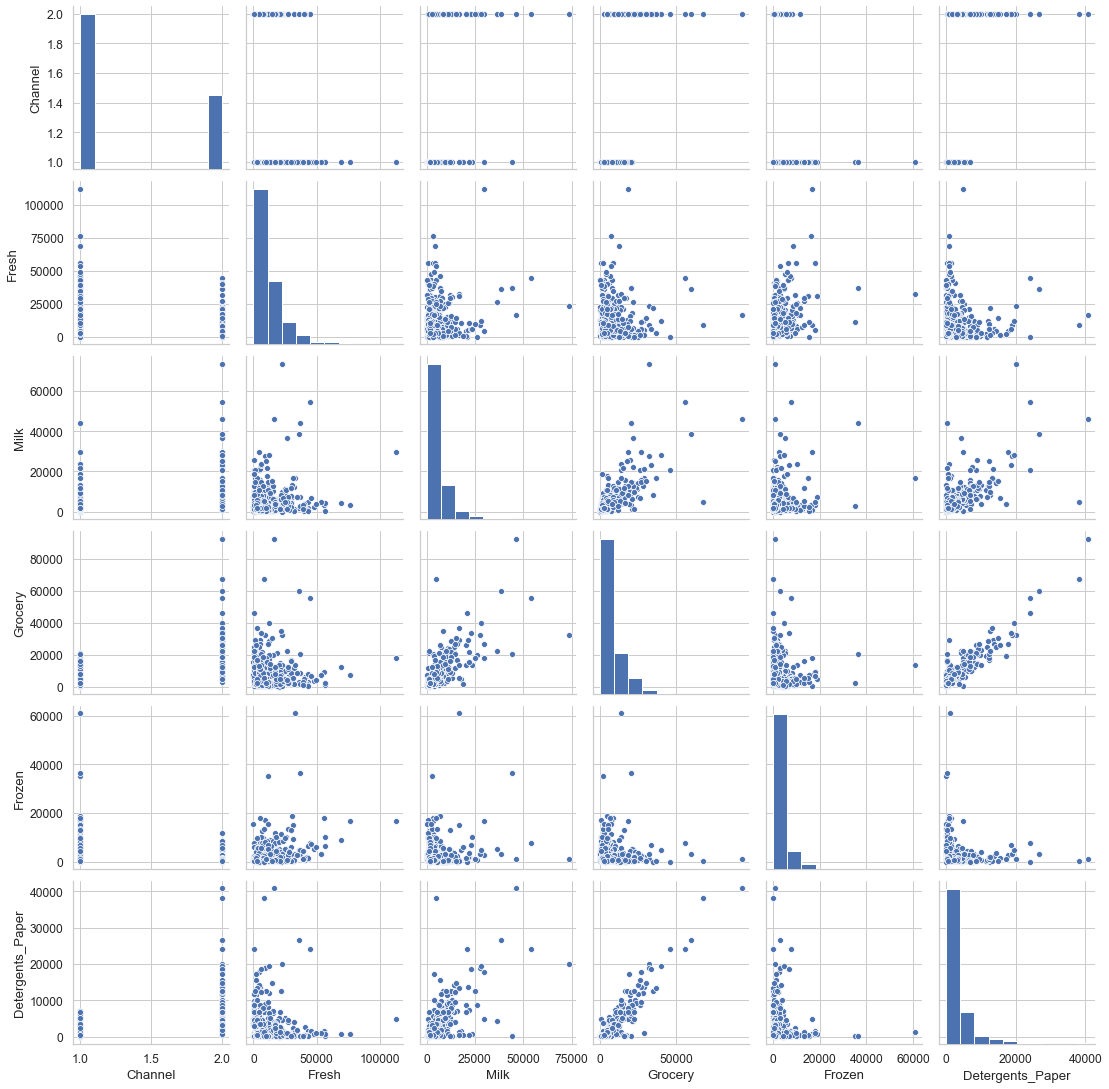

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


grid = sns.pairplot(data=df, vars=df.columns[0:6])

### Creating a TSNE Estimator to reduce the data to two dimensions

In [44]:

from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=11)


In [45]:
transform_tsne= tsne.fit_transform(df)

In [47]:
print(transform_tsne.shape) 
type(transform_tsne)

(440, 2)


numpy.ndarray

### Visualize the reduced data with TSNE

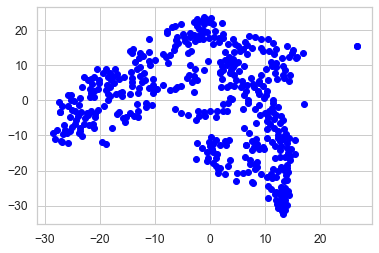

In [48]:
%matplotlib inline 
import matplotlib.pyplot as plt
dots = plt.scatter(transform_tsne[:, 0], transform_tsne[:, 1], c='blue')

### Dimensionality reduction with Principal Component Analysis (PCA)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=11)  # reduce to two components 
pca.fit(df)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=11,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
transform_pca = pca.transform(df) 
transform_pca.shape 

#type(transform_pca)


(440, 2)

### Visualize the reduced data with PCA

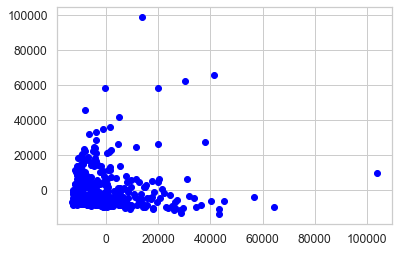

In [51]:
dots = plt.scatter(transform_pca[:, 0], transform_pca[:, 1], c='blue')


#### After performing PCA and TSNE estimators, we have decided to perform K-means on TSNE estimator values, which showed greater accuracy with more magnitude values 

### Creating a k-means estimator and fit the model

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=41)  # find three clusters 
kmeans.fit(transform_tsne) # performing K-means on tsne data


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=41, tol=0.0001, verbose=0)

In [53]:
kmeans_target=pd.DataFrame(kmeans.labels_)

In [54]:
df['Region']=kmeans_target


In [55]:
kmeans.cluster_centers_

array([[  8.846853 , -15.578232 ],
       [  3.454823 ,  11.476011 ],
       [-18.54859  ,   0.4052667]], dtype=float32)

#### Visualizing the dataset with a grid of graphs that each plots one data attribute against another with respective to the regions(newly labelled data)

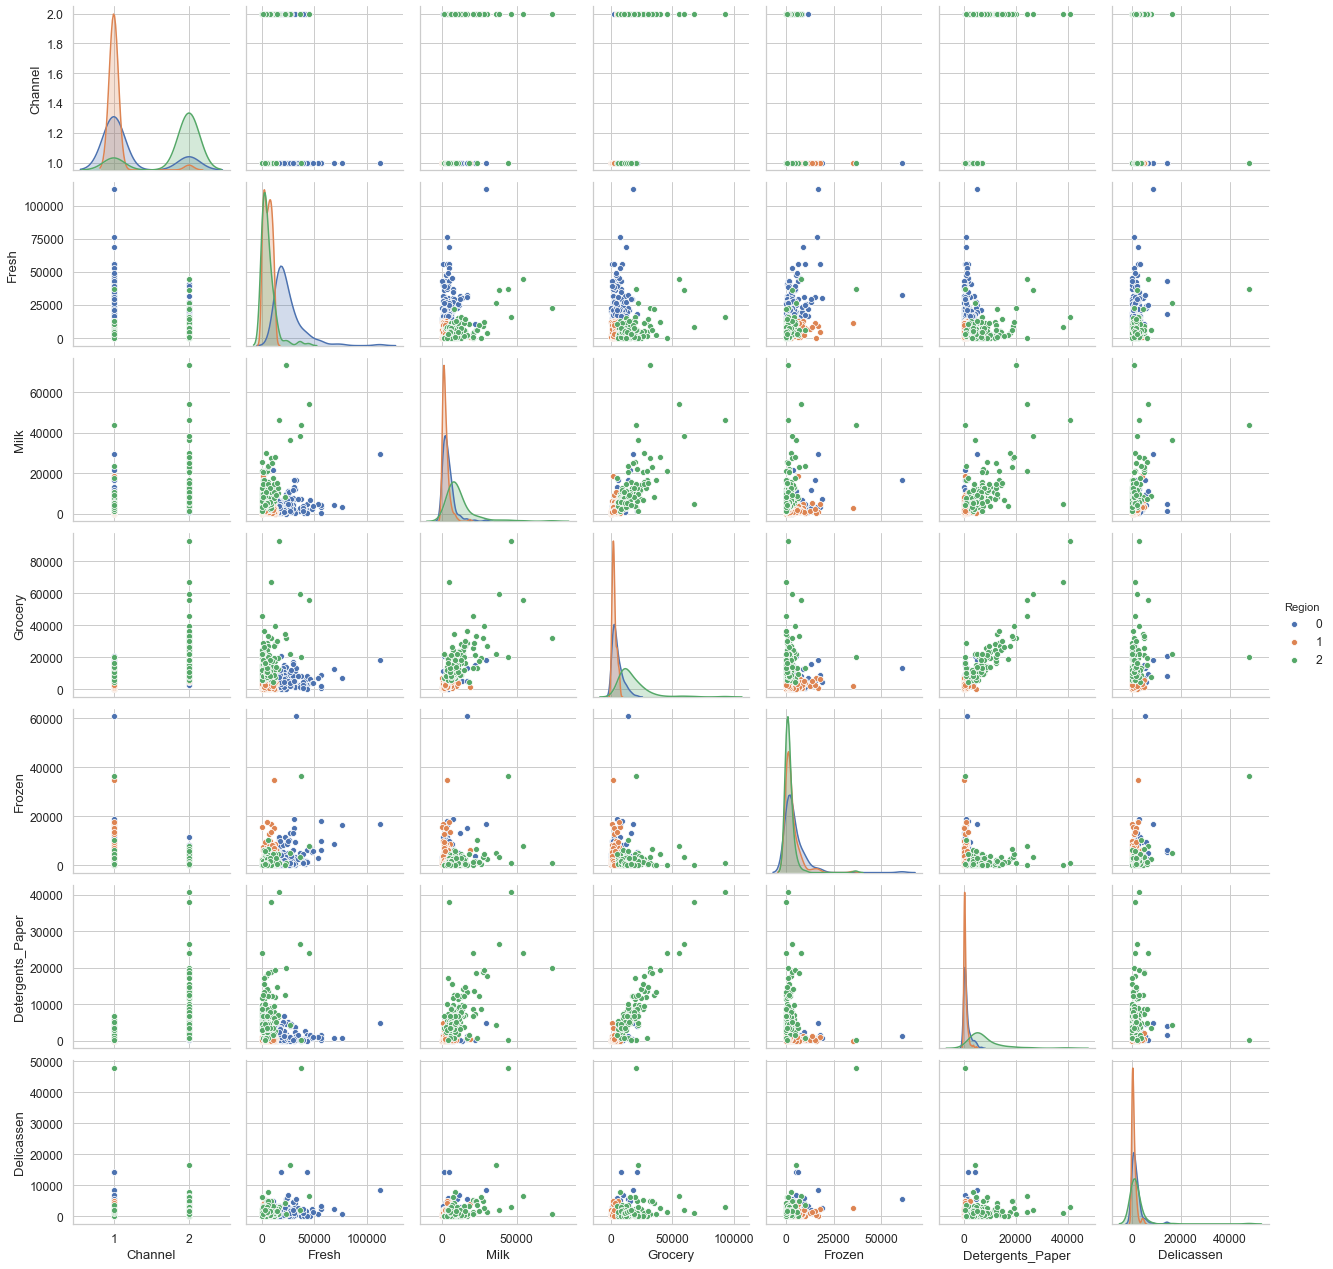

In [20]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.1) 
sns.set_style('whitegrid')
grid = sns.pairplot(data=df, vars=df.columns[0:7], hue='Region')

In [21]:
transform_tsne[:,1]

array([ -4.124867  ,   2.1824503 ,   6.0899177 ,   5.569311  ,
       -16.86333   ,  -3.1050744 ,  -2.9584029 ,   3.0263448 ,
         6.3712506 ,  -2.9491923 ,   5.8593564 ,  -2.588168  ,
       -21.030905  , -17.257328  , -18.660728  ,   1.377023  ,
         3.8099797 ,  10.153825  , -14.800398  ,   2.905514  ,
       -11.483384  ,  14.014411  , -20.958961  , -11.877949  ,
       -17.955576  , -11.971628  ,   4.001238  ,  -3.7293248 ,
        -6.7592716 , -27.245863  , -14.603319  ,  15.951516  ,
       -16.067513  , -21.75026   ,  20.405577  ,   7.7560887 ,
       -21.85044   ,  -4.7896886 ,  -2.7131221 , -29.78582   ,
       -18.07612   , -12.829302  ,  -3.4851434 ,  -2.631504  ,
        -0.6661304 ,  -6.970037  ,  -3.4195595 , -11.969557  ,
        -1.8068508 ,  -7.513603  ,  13.2264805 ,  13.760833  ,
       -26.779282  ,   2.8277326 , -20.404306  ,   7.231693  ,
        -8.753877  ,   2.4707744 ,  -3.0948133 ,   4.3754826 ,
         3.0871677 , -11.7209425 ,   4.3403893 ,  -3.96

### Visualize the reduced data with a different color according to Region

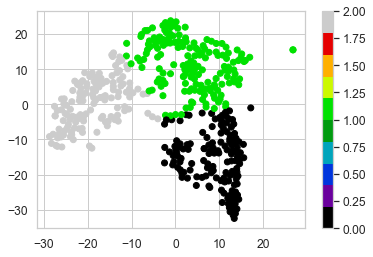

In [22]:
dots = plt.scatter(transform_tsne[:, 0], transform_tsne[:, 1], c=kmeans.labels_,cmap=plt.cm.get_cmap('nipy_spectral', 10))
colorbar = plt.colorbar(dots)

### Experiment - To find the optimum value of K

Text(0, 0.5, 'Inertia or SSE')

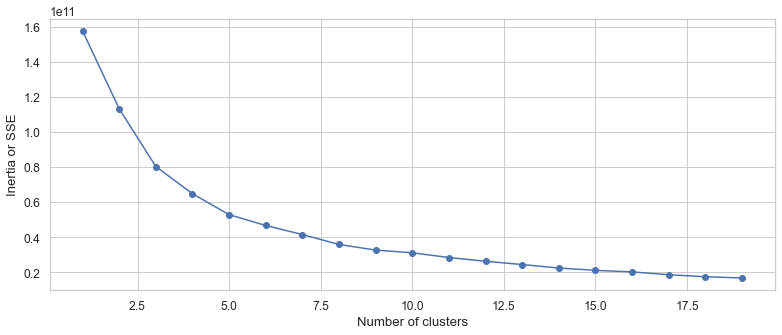

In [23]:
import numpy as np
clusters = range(1, 20)
sse=[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')

    model.fit(df)
    sse.append(model.inertia_)

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia or SSE')

### Visualize the reduced data with PCA

In [24]:
transform_pca = pd.DataFrame(transform_pca, 
                               columns=['Component 1', 'Component 2'])
transform_pca['Region'] = wholesale.Region

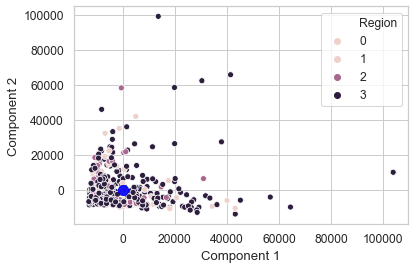

In [25]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=transform_pca, hue='Region', legend='brief', 
                       x='Component 1', y='Component 2') 

wholesale_centers = kmeans.cluster_centers_
dots = plt.scatter(wholesale_centers[:,0], wholesale_centers[:,1], s=100, c='blue',alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))


### All centriod points are formed at one index (0), due to the dense scatter points at same index centriods are not clearly visible, In the below graph we can observer 3 centriods at 0 index.

(-100.0, 100.0)

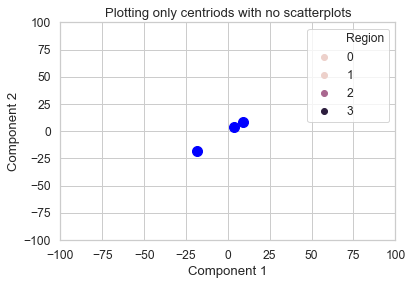

In [26]:
axes = sns.scatterplot(data=transform_pca, hue='Region', legend='brief', 
                       x='Component 1', y='Component 2') 

wholesale_centers = kmeans.cluster_centers_
dots = plt.scatter(wholesale_centers[:,0], wholesale_centers[:,0], s=100, c='blue')
plt.title("Plotting only centriods with no scatterplots")

plt.xlim(-100,100)
plt.ylim(-100,100)

### Experiment - Building the final model

In [27]:
model = KMeans(n_clusters=7,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=-1,
               algorithm='auto')

model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

#### From the below values we can see that 1st cluster has maximum number of samples, while 7th cluster has minimum number of samples.

In [28]:
pred = model.predict(df)
df['cluster'] = pred
print('\nCount in each cluster: \n', df['cluster'].value_counts())


Count in each cluster: 
 0    185
4    116
1     75
2     48
5      7
3      7
6      2
Name: cluster, dtype: int64


### Split the data for training and testing

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, kmeans.labels_, random_state=11)
print(f'X_train.shape = {X_train.shape}') 
print(f'X_test.shape  = {X_test.shape}')
print() 
print(f'y_train.shape = {y_train.shape}') 
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (330, 9)
X_test.shape  = (110, 9)

y_train.shape = (330,)
y_test.shape  = (110,)


### Creating and training the k-nearest neighbors model

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Model prediction accuracy

In [31]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 98.18%


### Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
predicted = knn.predict(X=X_test)
expected = y_test
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print('Confusion matrix:') 
print(confusion)

Confusion matrix:
[[34  0  0]
 [ 0 43  1]
 [ 0  1 31]]


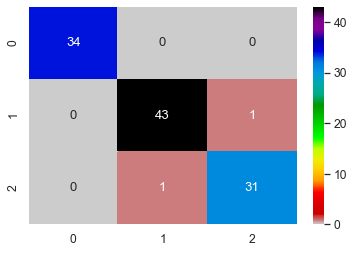

In [33]:
import pandas as pd 
import seaborn as sns
confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3)) 
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

### Classification report

In [34]:
from sklearn.metrics import classification_report

names = [str(df) for df in wholesale]
print(classification_report(expected, predicted,labels=[1,2,3],zero_division=0))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        44
           2       0.97      0.97      0.97        32
           3       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        76
   macro avg       0.65      0.65      0.65        76
weighted avg       0.97      0.97      0.97        76

